### Kmean and Dimension Reduction (90 min)

The sklearn wine dataset is a classic dataset often used in machine learning for classification tasks. It contains 178 samples with 13 features, each representing a different chemical analysis of Italian wines derived from three different cultivars. The features include alcohol content, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavonoids, nonflavonoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, an proline. The objective with this dataset is typically to build a model that can accurately predict the wine cultivar based on these chemical properties. It's an excellent resource for practicing data preprocessing, feature selection, and classification algorithms in the field of machine learning. The dataset is included in the sklearn.datasets module, making it readily accessible for educational and experimental purposes in Python.

## Importing necessary libraries and Loading Data (5 min):

1. Umap library is not pre-installed on your notebook. install it with `!pip`.

2. Load the necessary libraries.

3. Load the dataset with help of the fucntion `load_wine()`. Determine the number of distinct classes included. To get an initial overview, use `df.columns` and `pd.head()` to display the feature names and the first 5 records of the dataset.

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=bc88aebff6a1190e1886d87f6ff880079a4d93020039f26b905400db104e66e8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import umap

In [5]:
df = load_wine(as_frame=True)
df = df.frame
# print the shape of the dataset, the list of columns name, and the first 5 rows of dataset
print(df.shape)
print(list(df.columns))
df.head()

(178, 14)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Standardization (5 min):

1. Use the functions you learned previously to standardize the feaature inputs.

2. print out the first 5 rows of data and compare them with the data before the standardization

In [6]:
# features = StandardScaler().fit_transform(df)
scaler = StandardScaler()
features = scaler.fit(df)
features = features.transform(df)
# Convert to pandas Dataframe
scaled_df = pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944


## time estimation: 15 min
1. Plotting elbow curve for kmeans clustering, and choosing a final num of cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

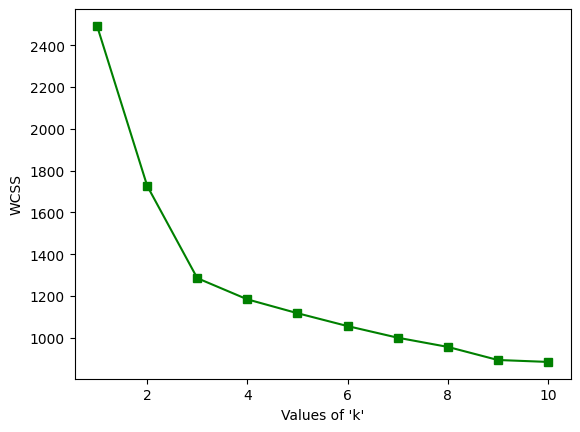

(3, 14)
[[ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461  1.34745816]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713 -1.17152057]
 [-0.9221257  -0.3788889  -0.46568753  0.17550695 -0.47025072 -0.07393442
   0.04428767  0.0087608   0.01826487 -0.86227808  0.42450329  0.24978206
  -0.76524984  0.07996036]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# for num of clusters 1 to 10, plot the elbow curve
X = scaled_df.values
# WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_


plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

# according to the plot, choose the suitable number of clusters and fit the model
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_.shape) # (3, 13)
print(kmeans.cluster_centers_) # 3 clusters, 13 features
print(kmeans.labels_) # 178 samples, each sample belongs to one of the 3 clusters

## Dimension Reduction with PCA: 15 min
1. Reduce the dimension of the features to 2 with the imported PCA funciton `PCA()`
2. Visualize the samples in 2D together with the centroids that have been created by Kmean with 3 clusters. Remeber you need to reduce the features of centroids as well to be able to visualize them in 2D.
3. Finally visualize the heatmap of the 13 features for each of the two component of PCA.

       PCA1      PCA2
0 -3.522934 -1.453098
1 -2.528858  0.330019
2 -2.785029 -1.036936
3 -3.922588 -2.768210
4 -1.407511 -0.867773


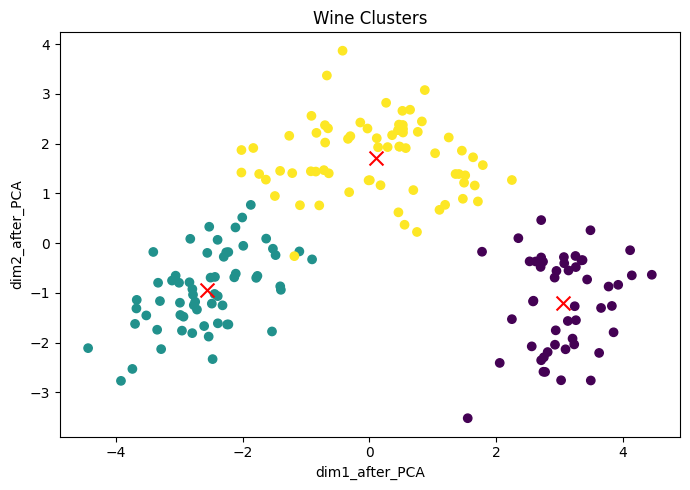

In [8]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
print(reduced_X.head())
# reduced centers features after PCA
centers = pca.transform(kmeans.cluster_centers_)
centers


# Scatter plot of the reduced data
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('dim1_after_PCA')
plt.ylabel('dim2_after_PCA')
plt.title('Wine Clusters')
plt.tight_layout()

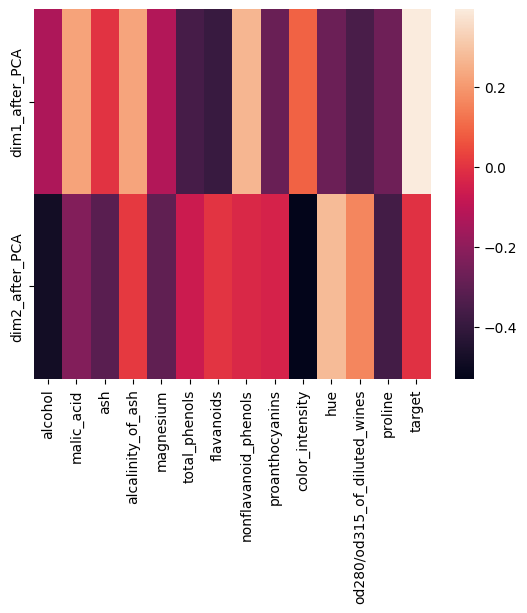

In [9]:
# Heat map c
pca.components_.shape
component_df = pd.DataFrame(pca.components_, index=['dim1_after_PCA', 'dim2_after_PCA'], columns=df.columns)
sns.heatmap(component_df)
plt.show()

## Dimension Reduction with PCA: 10 min
1. Split the dataset into train and test
2. Fit a kmean (k=3) clustering on the trainset
3. Infer the predictions on test set and get the accuracy in comparision with labels

In [14]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_df,df['target'], test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train kmean model on train data and test on test data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
print(kmeans.labels_)
print(kmeans.predict(X_test))
# get the accuracy score
print(accuracy_score(y_test,kmeans.predict(X_test)))


(151, 14) (27, 14) (151,) (27,)
[1 1 2 2 1 0 2 2 2 0 0 1 0 2 1 1 1 0 2 1 1 0 2 1 2 2 0 0 1 1 2 1 2 0 1 1 0
 2 2 2 0 2 2 2 0 1 2 0 1 2 0 1 1 2 1 2 2 1 2 2 0 1 1 1 2 1 1 1 0 0 2 1 0 0
 1 2 2 1 0 0 1 0 1 1 1 2 2 0 2 0 2 2 1 1 2 2 2 1 2 1 0 1 1 0 0 0 1 2 2 1 0
 0 2 1 0 0 0 0 1 2 1 2 0 2 2 1 2 2 0 1 2 0 0 2 2 0 0 0 1 1 1 1 1 1 0 2 1 1
 2 1 1]
[2 2 0 2 1 2 1 0 1 0 2 0 2 1 2 1 1 1 2 1 2 1 1 0 0 0 1]
0.4074074074074074


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Dimension Reduction with PCA: 5 min
1. Repeat the reduciton of feature dimension this time to 3. Again using the the imported PCA funciton `PCA()`
2. Visualize the 3D components of samples.

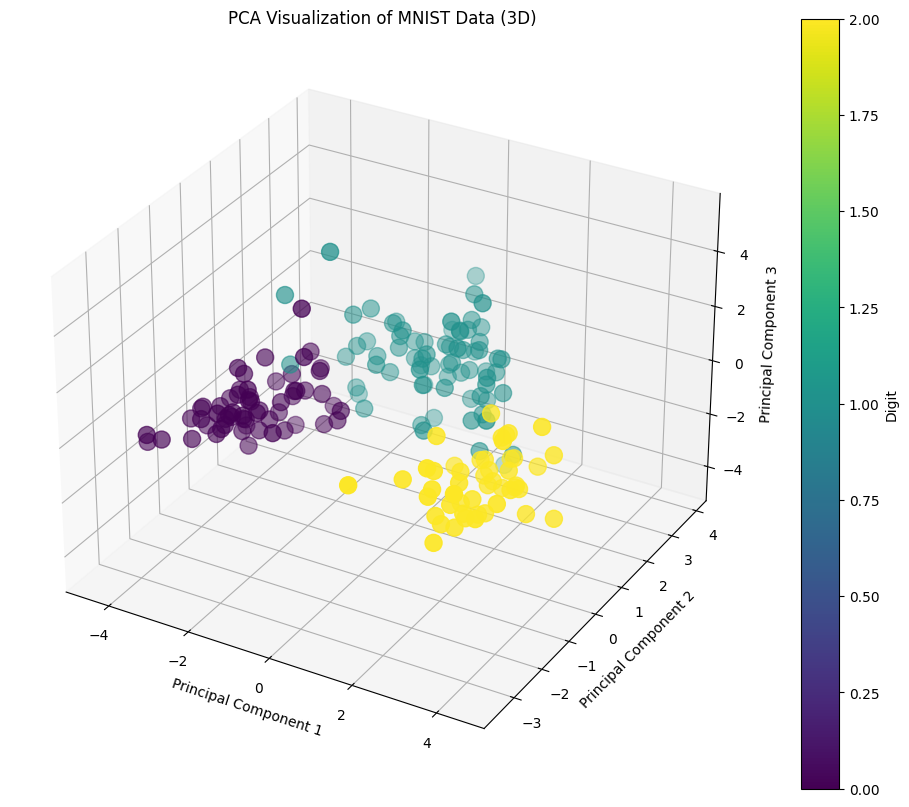

In [10]:
# Perform PCA for visualization with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# c = target column in the dataset (0-9)  .astype('float'),

# in the scatter plot bellow, GIVE EACH SAMPLE A COLOR ACCORDING TO ITS TARGET VALUE
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df.target, cmap='viridis', s=150)


plt.colorbar(scatter, label='Digit')
ax.set_title('PCA Visualization of MNIST Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


## Dimension Reduction with t-SNE: 10 min
1. Reduce the dimension of the features to 2 with the imported PCA funciton `PCA()`
2. Visualize the samples in 2D together with the centroids that have been created by Kmean with 3 clusters. Remeber you need to reduce the features of centroids as well to be able to visualize them in 2D.

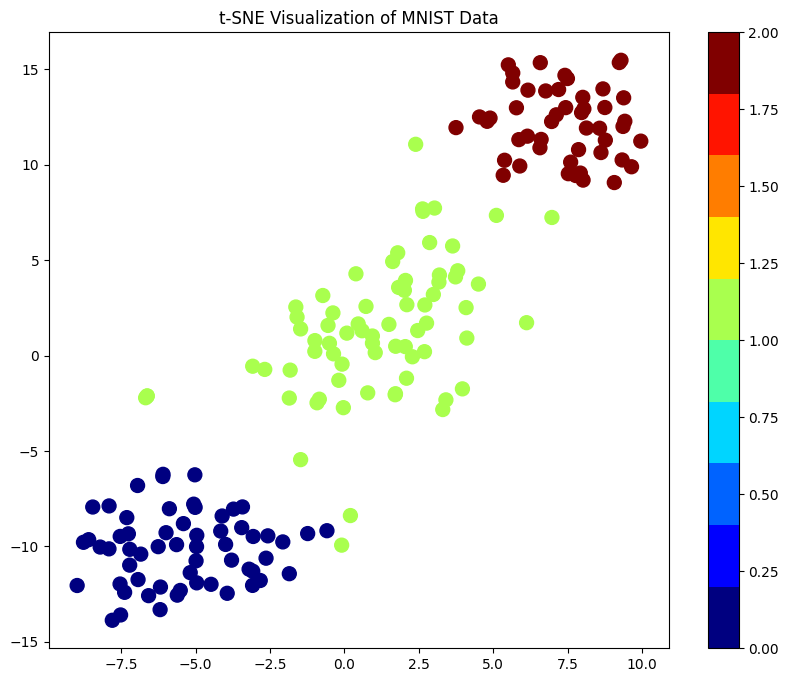

In [11]:

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.target, cmap=plt.get_cmap('jet', 10), marker='o', s=100)
plt.colorbar()
plt.title('t-SNE Visualization of MNIST Data')
plt.show()


## Dimension Reduction with Umap: 10 min
1. Reduce the dimension of the features to 2 with the imported PCA funciton `PCA()`
2. Visualize the samples in 2D together with the centroids that have been created by Kmean with 3 clusters. Remeber you need to reduce the features of centroids as well to be able to visualize them in 2D.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


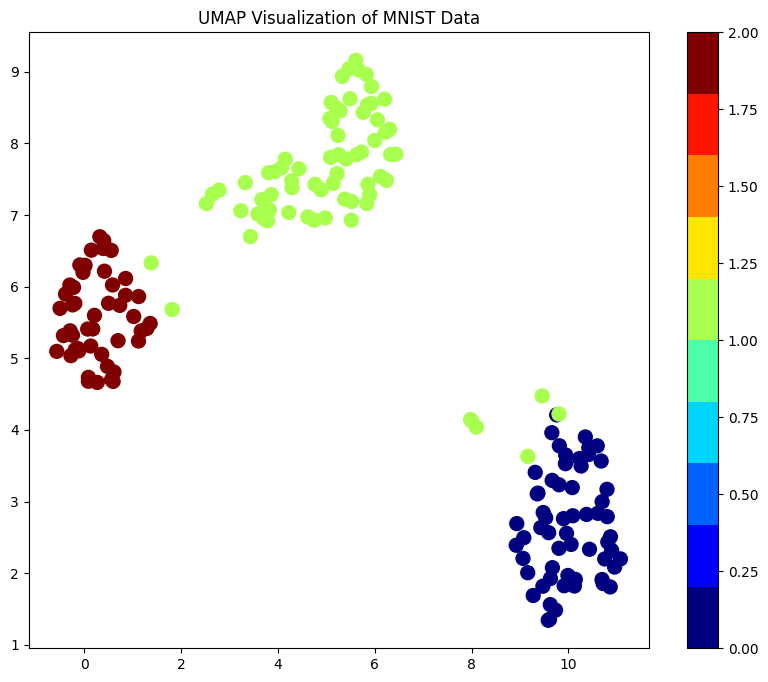

In [12]:
# Perform UMAP dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df.target, cmap=plt.get_cmap('jet', 10), marker='o', s=100)
plt.colorbar()
plt.title('UMAP Visualization of MNIST Data')
plt.show()